In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [46]:
#Extracting data from csv file into data frame
csv_path = "ca_data_jul20-jul21.csv"
census_df = pd.read_csv(csv_path,encoding="utf-8")
census_df


,date,county,state,cases,deaths
0,2020-07-01,Alameda,California,6177,136.0
1,2020-07-01,Alpine,California,1,0.0
2,2020-07-01,Amador,California,22,0.0
3,2020-07-01,Butte,California,189,2.0
4,2020-07-01,Calaveras,California,40,0.0
...,...,...,...,...,...
21136,2021-06-30,Trinity,California,342,3.0
21137,2021-06-30,Tulare,California,49896,852.0
21138,2021-06-30,Tuolumne,California,4242,71.0
21139,2021-06-30,Ventura,California,81884,1032.0


In [47]:
#checking for null values
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21141 entries, 0 to 21140
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    21141 non-null  object 
 1   county  21141 non-null  object 
 2   state   21141 non-null  object 
 3   cases   21141 non-null  int64  
 4   deaths  21141 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 825.9+ KB


In [48]:
#Find unique states from state column

unique_states = census_df.state.unique()
print(unique_states)

['California']


In [50]:
#Find unique counties from county column

unique_county = census_df.county.unique()
print(unique_county)

['Alameda' 'Alpine' 'Amador' 'Butte' 'Calaveras' 'Colusa' 'Contra Costa'
 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt' 'Imperial' 'Inyo'
 'Kern' 'Kings' 'Lake' 'Lassen' 'Los Angeles' 'Madera' 'Marin' 'Mariposa'
 'Mendocino' 'Merced' 'Mono' 'Monterey' 'Napa' 'Nevada' 'Orange' 'Placer'
 'Plumas' 'Riverside' 'Sacramento' 'San Benito' 'San Bernardino'
 'San Diego' 'San Francisco' 'San Joaquin' 'San Luis Obispo' 'San Mateo'
 'Santa Barbara' 'Santa Clara' 'Santa Cruz' 'Shasta' 'Sierra' 'Siskiyou'
 'Solano' 'Sonoma' 'Stanislaus' 'Sutter' 'Tehama' 'Trinity' 'Tulare'
 'Tuolumne' 'Ventura' 'Yolo' 'Yuba' 'Modoc']


In [51]:
#print number of unique states

print(f"The number of states are: {len(unique_states)}")

The number of states are: 1


In [52]:
#print number of unique conties

print(f"The number of counties are: {len(unique_county)}")

The number of counties are: 58


In [14]:
#Create dataframe which has total max cases in each county

total_cases_end = census_df.groupby('county').max()
total_cases_end.head()



,date,state,cases,deaths
county,,,,
Alameda,2021-06-30,California,90297,1693.0
Alpine,2021-06-30,California,89,0.0
Amador,2021-06-30,California,3753,47.0
Butte,2021-06-30,California,12697,201.0
Calaveras,2021-06-30,California,2210,56.0


In [16]:
#Create dataframe which has total min cases in each county

total_cases_begin = census_df.groupby('county').min()
total_cases_begin.head()


,date,state,cases,deaths
county,,,,
Alameda,2020-07-01,California,6177,136.0
Alpine,2020-07-01,California,1,0.0
Amador,2020-07-01,California,22,0.0
Butte,2020-07-01,California,189,2.0
Calaveras,2020-07-01,California,40,0.0


In [17]:
#Create dataframe which has total cases in each county in california
total_cases_end['Total_Cases'] = total_cases_end['cases'] - total_cases_begin['cases']
total_cases_end.head()

,date,state,cases,deaths,Total_Cases
county,,,,,
Alameda,2021-06-30,California,90297,1693.0,84120
Alpine,2021-06-30,California,89,0.0,88
Amador,2021-06-30,California,3753,47.0,3731
Butte,2021-06-30,California,12697,201.0,12508
Calaveras,2021-06-30,California,2210,56.0,2170


In [18]:
#Create dataframe which has total deaths in each county in california
total_cases_end['Total_Deaths'] = total_cases_end['deaths'] - total_cases_begin['deaths']
total_cases_end.head()

,date,state,cases,deaths,Total_Cases,Total_Deaths
county,,,,,,
Alameda,2021-06-30,California,90297,1693.0,84120,1557.0
Alpine,2021-06-30,California,89,0.0,88,0.0
Amador,2021-06-30,California,3753,47.0,3731,47.0
Butte,2021-06-30,California,12697,201.0,12508,199.0
Calaveras,2021-06-30,California,2210,56.0,2170,56.0


In [28]:
#California Total deaths
#sum of deaths in each county
#total_cases_end.loc['Total'] = total_cases_end.Series(total_cases_end["Total_Deaths"].sum(), index=['Total_Deaths'])

total_cases_end.append(pd.DataFrame(total_cases_end.Total_Deaths.sum(), index = ["Total"], columns=["Total_Deaths"]))


C:\Users\ektac\AppData\Local\Temp\ipykernel_20524\870914853.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_cases_end.append(pd.DataFrame(total_cases_end.Total_Cases.sum(), index = ["Total"], columns=["Total_Cases"]))
C:\Users\ektac\AppData\Local\Temp\ipykernel_20524\870914853.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_cases_end.append(pd.DataFrame(total_cases_end.Total_Deaths.sum(), index = ["Total"], columns=["Total_Deaths"]))


,date,state,cases,deaths,Total_Cases,Total_Deaths
Alameda,2021-06-30,California,90297.0,1693.0,84120.0,1557.0
Alpine,2021-06-30,California,89.0,0.0,88.0,0.0
Amador,2021-06-30,California,3753.0,47.0,3731.0,47.0
Butte,2021-06-30,California,12697.0,201.0,12508.0,199.0
Calaveras,2021-06-30,California,2210.0,56.0,2170.0,56.0
Colusa,2021-06-30,California,2288.0,18.0,2229.0,18.0
Contra Costa,2021-06-30,California,71250.0,817.0,68002.0,740.0
Del Norte,2021-06-30,California,1483.0,8.0,1432.0,8.0
El Dorado,2021-06-30,California,10428.0,117.0,10244.0,117.0
Fresno,2021-06-30,California,103121.0,1727.0,97832.0,1652.0


In [29]:
#California Total Cases

total_cases_end.append(pd.DataFrame(total_cases_end.Total_Cases.sum(), index = ["Total"], columns=["Total_Cases"]))

C:\Users\ektac\AppData\Local\Temp\ipykernel_20524\1758687801.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_cases_end.append(pd.DataFrame(total_cases_end.Total_Cases.sum(), index = ["Total"], columns=["Total_Cases"]))


,date,state,cases,deaths,Total_Cases,Total_Deaths
Alameda,2021-06-30,California,90297.0,1693.0,84120,1557.0
Alpine,2021-06-30,California,89.0,0.0,88,0.0
Amador,2021-06-30,California,3753.0,47.0,3731,47.0
Butte,2021-06-30,California,12697.0,201.0,12508,199.0
Calaveras,2021-06-30,California,2210.0,56.0,2170,56.0
Colusa,2021-06-30,California,2288.0,18.0,2229,18.0
Contra Costa,2021-06-30,California,71250.0,817.0,68002,740.0
Del Norte,2021-06-30,California,1483.0,8.0,1432,8.0
El Dorado,2021-06-30,California,10428.0,117.0,10244,117.0
Fresno,2021-06-30,California,103121.0,1727.0,97832,1652.0


In [33]:
#Calculate death_rate in each county Total Number of Deaths/Total Number of Cases

total_cases_end['Death_Rate'] = total_cases_end.Total_Deaths/total_cases_end.Total_Cases
total_cases_end

,date,state,cases,deaths,Total_Cases,Total_Deaths,Death_Rate
county,,,,,,,
Alameda,2021-06-30,California,90297,1693.0,84120,1557.0,0.018509
Alpine,2021-06-30,California,89,0.0,88,0.0,0.000000
Amador,2021-06-30,California,3753,47.0,3731,47.0,0.012597
Butte,2021-06-30,California,12697,201.0,12508,199.0,0.015910
Calaveras,2021-06-30,California,2210,56.0,2170,56.0,0.025806
Colusa,2021-06-30,California,2288,18.0,2229,18.0,0.008075
Contra Costa,2021-06-30,California,71250,817.0,68002,740.0,0.010882
Del Norte,2021-06-30,California,1483,8.0,1432,8.0,0.005587
El Dorado,2021-06-30,California,10428,117.0,10244,117.0,0.011421


In [38]:
#County with max death rate
Max_Death_Rate = total_cases_end['Death_Rate'].max()
Max_Death_Rate

0.028712606837606836

In [41]:
#print County with max death Rate
df = pd.DataFrame(total_cases_end)
print(df[df.Death_Rate == df.Death_Rate.max()])

                date       state  cases  deaths  Total_Cases  Total_Deaths  \
county                                                                       
Imperial  2021-06-30  California  28987   741.0        22464         645.0   

          Death_Rate  
county                
Imperial    0.028713  


([<matplotlib.patches.Wedge at 0x1fece525a00>,
 [Text(-0.9832708764011159, 0.6878796287297522, 'Deaths'),
  Text(0.9013316699093024, -0.6305562788669292, 'Cases')],
 [Text(-0.5735746779006509, 0.4012631167590221, '2.8%'),
  Text(0.4916354563141649, -0.3439397884728705, '97.2%')])

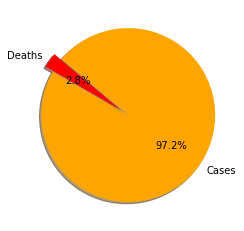

In [54]:
#Insert pie chart showing Total Deaths vs Total Cases in Imperial County
labels = ["Deaths", "Cases"]
sizes = [645, 22464]
colors = ["red", "orange"]
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [42]:
#Print County with min death rate
df = pd.DataFrame(total_cases_end)
print(df[df.Death_Rate == df.Death_Rate.min()])

              date       state  cases  deaths  Total_Cases  Total_Deaths  \
county                                                                     
Alpine  2021-06-30  California     89     0.0           88           0.0   
Sierra  2021-06-30  California     59     0.0           58           0.0   

        Death_Rate  
county              
Alpine         0.0  
Sierra         0.0  


([<matplotlib.patches.Wedge at 0x1fece4846d0>,
 [Text(-0.9567339049607566, 0.7243343393064711, 'Deaths'),
  Text(0.877006114515538, -0.6639730981766953, 'Cases')],
 [Text(-0.5580947778937746, 0.42252836459544146, '1.6%'),
  Text(0.4783669715539297, -0.3621671444600155, '98.4%')])

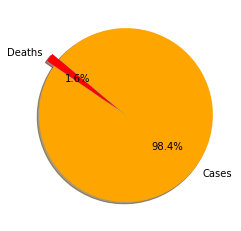

In [44]:
#Insert pie chart showing Total Deaths vs Total Cases in california
labels = ["Deaths", "Cases"]
sizes = [58030, 3580246]
colors = ["red", "orange"]
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)